### 강의에서 사용된 파이썬 주요 기능

- 선수별 노드 시각화하기
  - matplotlib.pyplot.scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
  - matplotlib.pyplot.annotate: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

- 선수간 패스 횟수 산출하기
  - numpy.histogram2d: https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html
  - 

- 시간대별 이벤트 발생 횟수 시각화하기
  - matplotlib.pyplot.bar: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
  - matplotlib.pyplot.barh: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html
  - matplotlib.pyplot.gca: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html
  - matplotlib.pyplot.xticks: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
  - matplotlib.pyplot.yticks: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html

### 경기 이벤트 데이터 및 선수교체 정보 불러오기

In [1]:
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
from src.plot_utils import draw_pitch

pd.set_option('display.max_rows', 30)

In [2]:
match_id = 2057987
events = pd.read_pickle(f'data/refined_events/World_Cup/{match_id}.pkl')
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2057987,259956834,1H,1.797,14855,Korea Republic,14911,Son Heung-Min,Pass,Simple pass,[Accurate],52.00,34.00,32.24,38.76
1,2057987,259956835,1H,4.181,14855,Korea Republic,61962,Sung-Yeung Ki,Pass,Simple pass,[Accurate],32.24,38.76,20.80,46.92
2,2057987,259956837,1H,10.078,14855,Korea Republic,95200,Young-Gwon Kim,Pass,Simple pass,[Accurate],20.80,46.92,19.76,16.32
3,2057987,259956840,1H,12.278,14855,Korea Republic,138633,Hyun-Soo Jang,Others on the ball,Touch,[],19.76,16.32,33.28,8.84
4,2057987,259956841,1H,15.823,14855,Korea Republic,138633,Hyun-Soo Jang,Pass,Simple pass,[Not accurate],33.28,8.84,38.48,8.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2057987,259958565,2H,2995.205,15473,Mexico,112522,J. Corona,Pass,Simple pass,[Accurate],74.88,57.12,63.44,55.08
1453,2057987,259958567,2H,2997.217,15473,Mexico,3795,H. Moreno,Pass,Simple pass,[Accurate],63.44,55.08,59.28,45.56
1454,2057987,259958568,2H,2997.948,15473,Mexico,59003,R. Márquez,Pass,Simple pass,[Accurate],59.28,45.56,31.20,48.96
1455,2057987,259958570,2H,3000.929,15473,Mexico,255387,C. Salcedo,Pass,Simple pass,[Accurate],31.20,48.96,22.88,26.52


In [3]:
substitutions = pd.read_csv(f'data/refined_events/World_Cup/substitutions.csv', header=0)
substitutions

,match_id,team_id,player_in,player_out,minute
0,2058017,9598,69411,69616,71
1,2058017,9598,135810,105361,81
2,2058017,4418,8200,31528,55
3,2058017,4418,209091,25437,73
4,2058017,4418,28115,26010,81
...,...,...,...,...,...
376,2057954,14358,220971,101699,64
377,2057954,14358,101669,101707,70
378,2057954,16521,122623,139393,64
379,2057954,16521,122615,122888,74


### 선수별 노드 시각화하기

##### (1) 선수별 평균 패스 위치 및 패스 횟수 산출

In [9]:
passes = events[events['event_type'] == 'Pass']
pass_summary = passes.groupby(['team_name', 'player_name'])[['start_x', 'start_y']].mean()
pass_summary['total_count'] = passes.groupby(['team_name', 'player_name'])['event_id'].count()
pass_summary

start_x    start_y  total_count
team_name      player_name                                      
Korea Republic Chul Hong       38.653333  59.726667            6
               Hwang Hee-Chan  67.822857  44.102857           14
               Hyun-Soo Jang   32.303030  19.143030           33
               Hyun-Woo Cho    10.515556  35.057778            9
               Jae-Sung Lee    57.103256  29.635349           43
               Lee Seung-Woo   62.240000  49.901538           13
               Min-Woo Kim     52.614545  59.160000           22
               Se-Jong Ju      50.758710  31.280000           31
               Seon-Min Moon   65.569524  17.485714           21
               Son Heung-Min   68.917333  35.337333           30
               Sung-Yeung Ki   49.552941  39.440000           34
               Woo-Young Jung  51.610000  26.605000            8
               Yong Lee        50.329697   6.944242           33
               Young-Gwon Kim  34.085161  45.713548           31
Mexico         A. Guardado     57.415172  31.280000           29
               C. Salcedo      35.237647  25.350000           68
               C. Vela         67.456552  32.077241           29
               E. Álvarez      48.960000  11.696000           65
               G. Ochoa        14.498824  34.480000           17
               G. dos Santos   66.820000  35.360000            4
               H. Herrera      57.786182  27.583273           55
               H. Lozano       65.371429  50.028571           14
               H. Moreno       38.683922  52.760000           51
               J. Corona       67.920000  55.184615           13
               J. Gallardo     49.093333  58.793846           39
               J. Hernández    64.751304  23.533913           23
               M. Layún        71.172174  12.713043           23
               R. Márquez      51.124211  30.814737           19

##### (2) 출전 선수 전체 노드(Node) 시각화

In [10]:
team_name = 'Korea Republic'
nodes = pass_summary.loc[team_name].reset_index()
nodes

,player_name,start_x,start_y,total_count
0,Chul Hong,38.653333,59.726667,6
1,Hwang Hee-Chan,67.822857,44.102857,14
2,Hyun-Soo Jang,32.303030,19.143030,33
3,Hyun-Woo Cho,10.515556,35.057778,9
4,Jae-Sung Lee,57.103256,29.635349,43
5,Lee Seung-Woo,62.240000,49.901538,13
6,Min-Woo Kim,52.614545,59.160000,22
7,Se-Jong Ju,50.758710,31.280000,31
8,Seon-Min Moon,65.569524,17.485714,21
9,Son Heung-Min,68.917333,35.337333,30


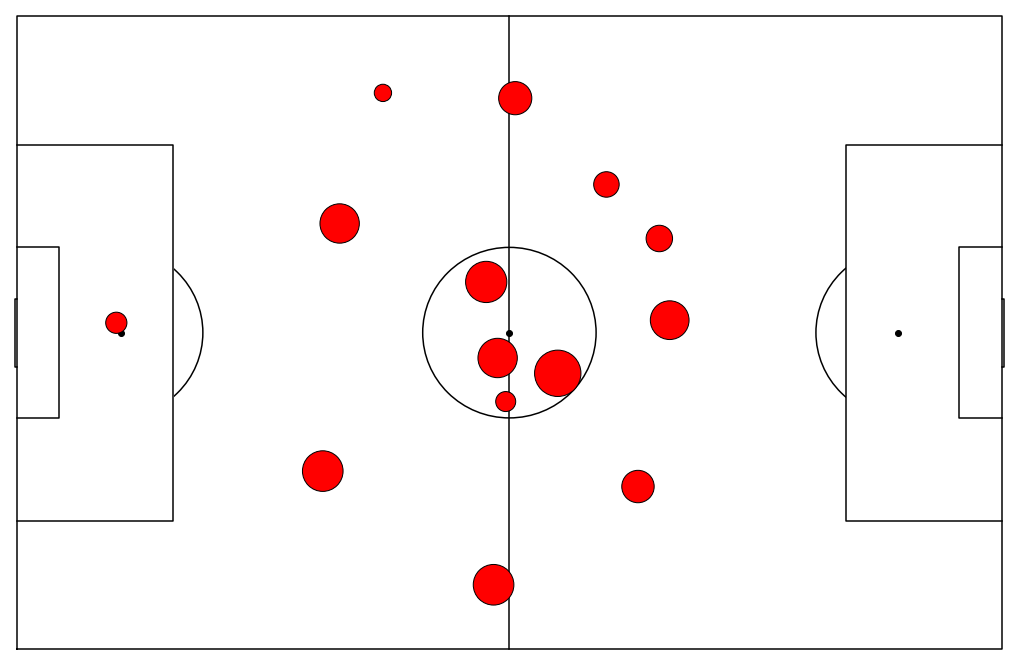

In [11]:
draw_pitch('white', 'black', size_x=18, size_y=12)

x = nodes['start_x']
y = nodes['start_y']
s = nodes['total_count'] * 50
plt.scatter(x, y, s=s, c='red', edgecolors='black')

# for i, node in nodes.iterrows():
#     plt.annotate(node['player_name'], xy=(node['start_x'], node['start_y']), c='k', fontsize=15)

In [ ]:
substitutions[substitutions['match_id'] == match_id]

,match_id,team_id,player_in,player_out,minute
215,2057987,15473,59003,3384,68
216,2057987,15473,112522,295156,71
217,2057987,15473,8297,3685,77
218,2057987,14855,403546,209567,63
219,2057987,14855,95490,51625,76
220,2057987,14855,107413,95299,83


In [11]:
team_events = events[
    (events['team_name'] == 'Korea Republic') &
    ((events['period'] == '1H') | (events['time'] < 60 * 18))
].reset_index(drop=True)
team_passes = team_events[team_events['event_type'] == 'Pass']

nodes = team_passes.groupby('player_name')[['start_x', 'start_y']].mean()
nodes['total_count'] = team_passes.groupby('player_name')['event_id'].count()
nodes

,start_x,start_y,total_count
player_name,,,
Hwang Hee-Chan,63.266667,43.860000,12
Hyun-Soo Jang,27.465455,16.938182,22
Hyun-Woo Cho,9.706667,36.720000,6
Jae-Sung Lee,48.582857,37.400000,21
Min-Woo Kim,47.435556,58.328889,18
Se-Jong Ju,50.758710,31.280000,31
Seon-Min Moon,63.072941,20.560000,17
Son Heung-Min,66.791111,30.033333,18
Sung-Yeung Ki,49.226667,41.310000,24


### 선수간 패스 횟수 산출하기

In [ ]:
pass_count_dict = defaultdict(int)
pass_count_dict

In [12]:
pass_count_dict = defaultdict(int)

for i in team_events.index[:-2]:
    event = team_events.loc[i]
    next_event = team_events.loc[i+1]

    if event['event_type'] == 'Pass' and 'Accurate' in event['tags']:
        sender = event['player_name']
        receiver = next_event['player_name']
        pass_count_dict[(sender, receiver)] += 1

pass_count_dict

defaultdict(int,
            {('Son Heung-Min', 'Sung-Yeung Ki'): 3,
             ('Sung-Yeung Ki', 'Young-Gwon Kim'): 4,
             ('Young-Gwon Kim', 'Hyun-Soo Jang'): 1,
             ('Young-Gwon Kim', 'Se-Jong Ju'): 2,
             ('Hyun-Woo Cho', 'Hyun-Soo Jang'): 2,
             ('Hyun-Soo Jang', 'Yong Lee'): 6,
             ('Se-Jong Ju', 'Hyun-Soo Jang'): 4,
             ('Hyun-Soo Jang', 'Se-Jong Ju'): 4,
             ('Seon-Min Moon', 'Son Heung-Min'): 1,
             ('Son Heung-Min', 'Min-Woo Kim'): 3,
             ('Yong Lee', 'Hyun-Soo Jang'): 6,
             ('Se-Jong Ju', 'Seon-Min Moon'): 4,
             ('Sung-Yeung Ki', 'Min-Woo Kim'): 3,
             ('Min-Woo Kim', 'Jae-Sung Lee'): 3,
             ('Jae-Sung Lee', 'Se-Jong Ju'): 6,
             ('Seon-Min Moon', 'Hwang Hee-Chan'): 2,
             ('Hwang Hee-Chan', 'Yong Lee'): 1,
             ('Seon-Min Moon', 'Se-Jong Ju'): 4,
             ('Hyun-Woo Cho', 'Son Heung-Min'): 1,
             ('Son Heung-Min', 'Y

In [13]:
pass_count_list = []

for pair, count in pass_count_dict.items():
    pass_count_list.append([pair[0], pair[1], count])

pass_count_df = pd.DataFrame(pass_count_list, columns=['sender', 'receiver', 'count'])
pass_count_df

,sender,receiver,count
0,Son Heung-Min,Sung-Yeung Ki,3
1,Sung-Yeung Ki,Young-Gwon Kim,4
2,Young-Gwon Kim,Hyun-Soo Jang,1
3,Young-Gwon Kim,Se-Jong Ju,2
4,Hyun-Woo Cho,Hyun-Soo Jang,2
...,...,...,...
70,Sung-Yeung Ki,Yong Lee,3
71,Hyun-Soo Jang,Seon-Min Moon,1
72,Son Heung-Min,Seon-Min Moon,1
73,Young-Gwon Kim,Sung-Yeung Ki,1


In [14]:
pass_count_dict = defaultdict(int)

for i in team_events.index[:-2]:
    event = team_events.loc[i]
    next_event = team_events.loc[i+1]

    if event['event_type'] == 'Pass' and 'Accurate' in event['tags']:
        player_pair = [event['player_name'], next_event['player_name']]
        player1 = min(player_pair)
        player2 = max(player_pair)
        pass_count_dict[(player1, player2)] += 1

pass_count_list = []

for pair, count in pass_count_dict.items():
    pass_count_list.append([pair[0], pair[1], count])

edges = pd.DataFrame(pass_count_list, columns=['player1', 'player2', 'count'])
edges

,player1,player2,count
0,Son Heung-Min,Sung-Yeung Ki,6
1,Sung-Yeung Ki,Young-Gwon Kim,5
2,Hyun-Soo Jang,Young-Gwon Kim,2
3,Se-Jong Ju,Young-Gwon Kim,3
4,Hyun-Soo Jang,Hyun-Woo Cho,3
...,...,...,...
40,Hyun-Soo Jang,Jae-Sung Lee,2
41,Min-Woo Kim,Se-Jong Ju,1
42,Hyun-Woo Cho,Seon-Min Moon,1
43,Sung-Yeung Ki,Yong Lee,3


### 패스 횟수와 평균 위치 데이터 결합하기

In [15]:
edges[edges['player1'] == 'Son Heung-Min']

,player1,player2,count
0,Son Heung-Min,Sung-Yeung Ki,6
16,Son Heung-Min,Yong Lee,5
36,Son Heung-Min,Young-Gwon Kim,1


In [16]:
edges = pd.merge(edges, nodes[['start_x', 'start_y']], left_on='player1', right_index=True)
edges

,player1,player2,count,start_x,start_y
0,Son Heung-Min,Sung-Yeung Ki,6,66.791111,30.033333
16,Son Heung-Min,Yong Lee,5,66.791111,30.033333
36,Son Heung-Min,Young-Gwon Kim,1,66.791111,30.033333
1,Sung-Yeung Ki,Young-Gwon Kim,5,49.226667,41.310000
43,Sung-Yeung Ki,Yong Lee,3,49.226667,41.310000
...,...,...,...,...,...
38,Hwang Hee-Chan,Min-Woo Kim,3,63.266667,43.860000
39,Hwang Hee-Chan,Se-Jong Ju,1,63.266667,43.860000
15,Hyun-Woo Cho,Son Heung-Min,1,9.706667,36.720000
28,Hyun-Woo Cho,Young-Gwon Kim,1,9.706667,36.720000


In [17]:
edges = edges.rename(columns={'start_x': 'player1_x', 'start_y': 'player1_y'})
edges = pd.merge(edges, nodes[['start_x', 'start_y']], left_on='player2', right_index=True)
edges

,player1,player2,count,player1_x,player1_y,start_x,start_y
0,Son Heung-Min,Sung-Yeung Ki,6,66.791111,30.033333,49.226667,41.310000
27,Hyun-Soo Jang,Sung-Yeung Ki,2,27.465455,16.938182,49.226667,41.310000
18,Se-Jong Ju,Sung-Yeung Ki,6,50.758710,31.280000,49.226667,41.310000
31,Seon-Min Moon,Sung-Yeung Ki,1,63.072941,20.560000,49.226667,41.310000
10,Min-Woo Kim,Sung-Yeung Ki,6,47.435556,58.328889,49.226667,41.310000
...,...,...,...,...,...,...,...
37,Min-Woo Kim,Seon-Min Moon,2,47.435556,58.328889,63.072941,20.560000
29,Jae-Sung Lee,Seon-Min Moon,5,48.582857,37.400000,63.072941,20.560000
13,Hwang Hee-Chan,Seon-Min Moon,5,63.266667,43.860000,63.072941,20.560000
42,Hyun-Woo Cho,Seon-Min Moon,1,9.706667,36.720000,63.072941,20.560000


In [18]:
edges = edges.rename(columns={'start_x': 'player2_x', 'start_y': 'player2_y'}).reset_index(drop=True)
edges

,player1,player2,count,player1_x,player1_y,player2_x,player2_y
0,Son Heung-Min,Sung-Yeung Ki,6,66.791111,30.033333,49.226667,41.310000
1,Hyun-Soo Jang,Sung-Yeung Ki,2,27.465455,16.938182,49.226667,41.310000
2,Se-Jong Ju,Sung-Yeung Ki,6,50.758710,31.280000,49.226667,41.310000
3,Seon-Min Moon,Sung-Yeung Ki,1,63.072941,20.560000,49.226667,41.310000
4,Min-Woo Kim,Sung-Yeung Ki,6,47.435556,58.328889,49.226667,41.310000
...,...,...,...,...,...,...,...
40,Min-Woo Kim,Seon-Min Moon,2,47.435556,58.328889,63.072941,20.560000
41,Jae-Sung Lee,Seon-Min Moon,5,48.582857,37.400000,63.072941,20.560000
42,Hwang Hee-Chan,Seon-Min Moon,5,63.266667,43.860000,63.072941,20.560000
43,Hyun-Woo Cho,Seon-Min Moon,1,9.706667,36.720000,63.072941,20.560000


### 선수간 관계별 간선 시각화하기

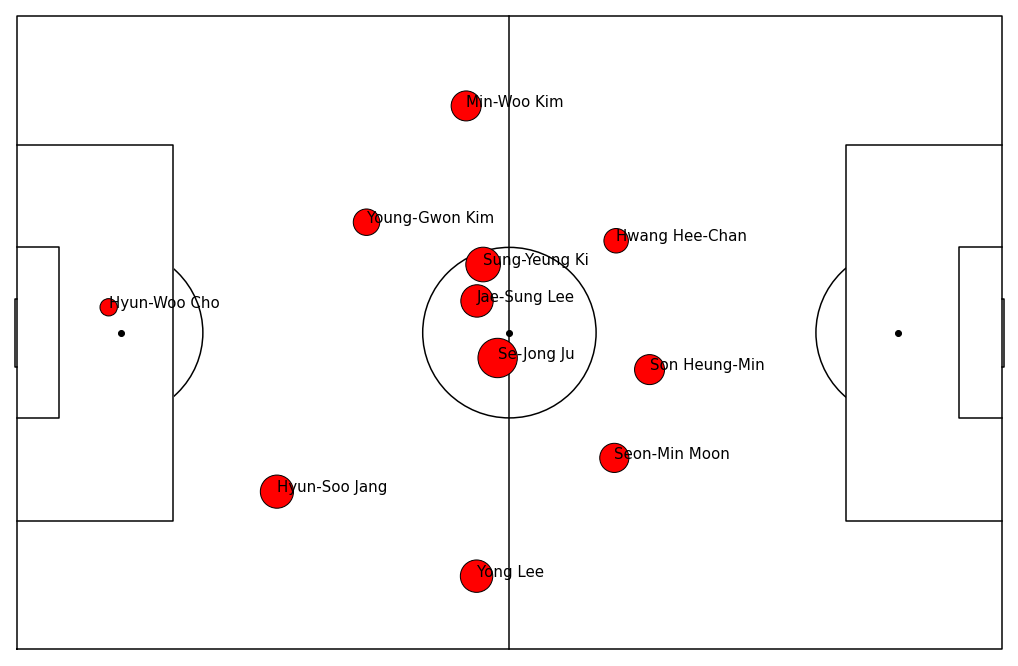

In [20]:
draw_pitch('white', 'black', size_x=18, size_y=12)

x = nodes['start_x']
y = nodes['start_y']
s = nodes['total_count'] * 50
plt.scatter(x, y, s=s, c='red', edgecolors='black')

for i, node in nodes.iterrows():
    plt.annotate(node.name, xy=(node['start_x'], node['start_y']), c='k', fontsize=15)

plt.show()

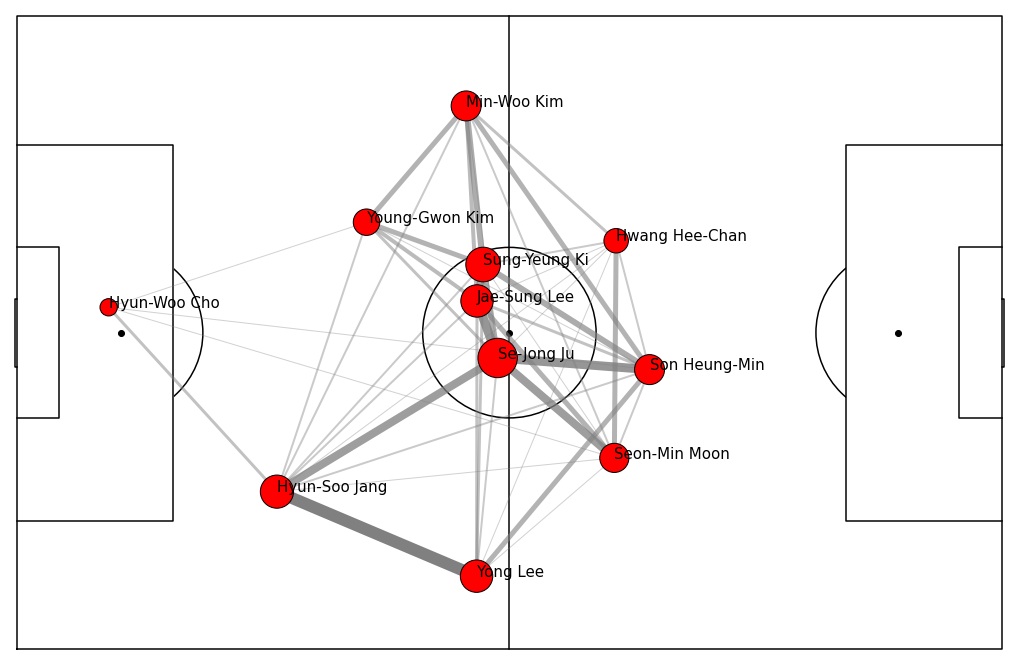

In [24]:
draw_pitch('white', 'black', size_x=18, size_y=12)

x = nodes['start_x']
y = nodes['start_y']
s = nodes['total_count'] * 50
plt.scatter(x, y, s=s, c='red', edgecolors='black', zorder=2)

for i, node in nodes.iterrows():
    plt.annotate(node.name, xy=(node['start_x'], node['start_y']), c='k', fontsize=15, zorder=3)

max_count = edges['count'].max()
for i, edge in edges.iterrows():
    alpha = edge['count'] / max_count * 0.7 + 0.3
    plt.plot(
        edge[['player1_x', 'player2_x']], edge[['player1_y', 'player2_y']],
        lw=edge['count'], color='grey', alpha=alpha, zorder=1
    )

plt.show()